# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

In this exercise, we are using a Monte Carlo method to calculate the prices of European call and put options.

A **call option** is a financial contract between a buyer (*holder*) and a seller (*writer*). It allows the holder the right, but not the obligation, to purchase an asset at a predetermined price, $K$ (known as the **strike price**) at a specified point in the future.

The Call function is expressed by : <$\mathrm{exp}(-r T) \, \mathrm{max}[0,K-S_{final}]$>

On the other hand, a **put option** is another type of financial contract. It grants the holder (the buyer of the put option) the right to sell an underlying financial asset to the writer (the seller of the put) at a specific strike price at a predetermined time.

The Put function is given by : <$\mathrm{exp}(-r\cdot T) \, \mathrm{max}[0,S_{final}-K]$>

These options provide investors and traders with the flexibility to manage their risk and speculate on the future price movements of financial assets. Monte Carlo methods are used to estimate the prices of these options by simulating multiple possible future scenarios and averaging the results to derive an expected option price.

These functions represent the expected value of the estimated profit, adjusted by a factor of $\mathrm{exp}(-r T)$. Here, is the reciprocal of the asset price's growth rate, and signifies the constant interest rate. Essentially, this factor considers the foregone interest income from holding the asset until the option's expiration date. The same principle applies to a put option, except in this case, there is a change of sign.



### For comparison, Black-Scholes analytic solution:

With the hypothesis that the asset price evolution is: , which is the evolution of a geometric brownian motion (r, risk free interest rate, and ,$\sigma$ volatility, both constant)
- Assuming that the **asset** price follows a **geometric Brownian motion** (GBM) with constant parameters, where "r" represents the risk-free interest rate and "$\sigma$" represents the volatility, we can express it as: 
$
S(t) \sim \mathrm{GMB}(r,\sigma)
$
- The Markov assumption states that it is given by a perfectly efficient market, namely the evolution of the system depends only on the situation at $t$.

The result is given by the **Black-Scholes analytical solution**:

In [13]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Sampling the simulations

We calculate the means and uncertainties through the standard blocking method and then compare our findings with the analytical solution provided by Black-Scholes. Our results, obtained through both approaches, align with the theoretical outcome. Considering the practicality of discretized samples in situations where time evolution is more complex and lacks analytical solutions, it becomes a preferred choice. This is especially relevant for real-life scenarios where time dynamics are not as straightforward as in this case.

**Direct sample**
We can perform the direct sample beacouse the motion of $\mathrm{GMB}(r,\sigma)$ is known as the analytical solution of the differential equation: $dS(t)=\mu \, S(t) \mathrm{dt} + \sigma S(t) \, \mathrm{dW}(t)$ that is:
$$
    S(T) = S(0)e^{(r-0.5 \, \sigma^2) \, T}+\sigma \, \mathrm{W}(T).
$$
With $\mathrm{W}(T) \sim N(0,T)$

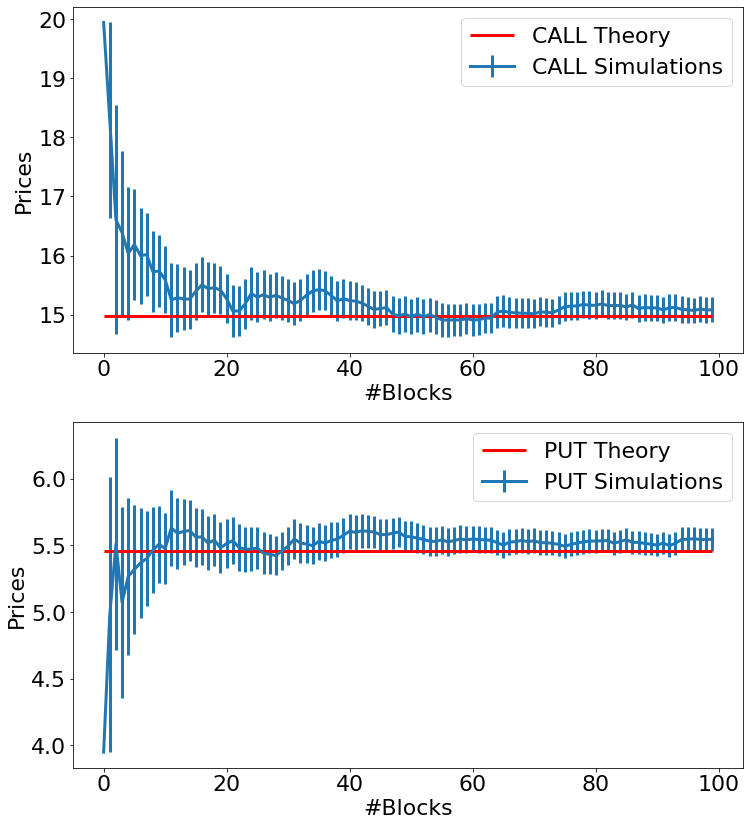

In [20]:
#Definisco alcune variabili
M=100000
N=100
x = np.arange(100)


call_sum, call_err = np.loadtxt("./data/call1.dat", usecols=(0,1), delimiter=',', unpack='true')
put_sum, put_err = np.loadtxt("./data/put1.dat", usecols=(0,1), delimiter=',', unpack='true')


plt.figure(figsize=(12,14))
plt.subplot(2, 1, 1) 
plt.errorbar(x,call_sum,yerr=call_err,linewidth = 3,label="CALL Simulations")
plt.hlines(call,0,x[-1],linewidth = 3, label ="CALL Theory", color = "red")
plt.xlabel('#Blocks')
plt.ylabel('Prices')
plt.legend()

plt.subplot(2, 1, 2) 
plt.errorbar(x,put_sum,yerr=put_err,linewidth = 3,label="PUT Simulations")
plt.hlines(put,0,x[-1],linewidth = 3, label ="PUT Theory", color = "red")
plt.xlabel('#Blocks')
plt.ylabel('Prices')
plt.legend()
#plt.grid(True)
plt.show()

**Discretized sample**
To model the path of the asset's price, we divide the time interval into a series of 100 subintervals. The time evolution of the asset's price is then represented by a discretized process.
$$
    S(t_{i+1}) = S(t_{i}) \mathrm{exp}[(r-0.5 \, \sigma^2) \, (t_{i+1}-t_{i})+\sigma \, Z_{i+1} \, \sqrt{t_{i+1}-t_i}].
$$
With $Z_i \in N(0,1)$

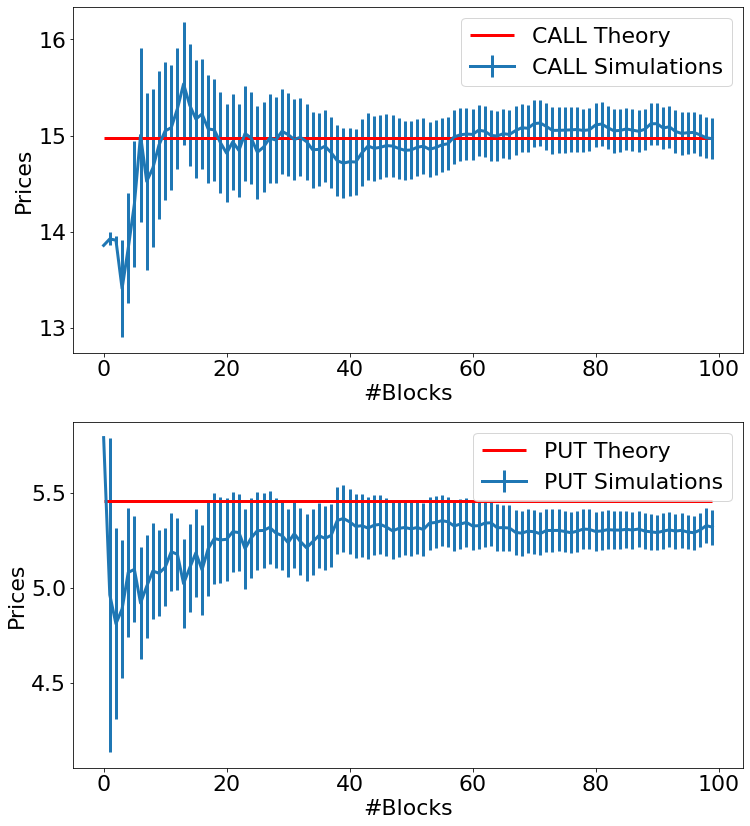

In [21]:
call_sum, call_err = np.loadtxt("./data/call2.dat", usecols=(0,1), delimiter=',', unpack='true')
put_sum, put_err = np.loadtxt("./data/put2.dat", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(12,14))
plt.subplot(2, 1, 1) 
plt.errorbar(x,call_sum,yerr=call_err,linewidth = 3,label="CALL Simulations")
plt.hlines(call,0,x[-1],linewidth = 3, label ="CALL Theory", color = "red")
plt.xlabel('#Blocks')
plt.ylabel('Prices')
plt.legend()

plt.subplot(2, 1, 2) 
plt.errorbar(x,put_sum,yerr=put_err,linewidth = 3,label="PUT Simulations")
plt.hlines(put,0,x[-1],linewidth = 3, label ="PUT Theory", color = "red")
plt.xlabel('#Blocks')
plt.ylabel('Prices')
plt.legend()
#plt.grid(True)
plt.show()

Parameters values are: 
$$S0 = 100, K = 100, r = 0.1, \sigma = 0.25, T = 1, dt = 0.01.$$